In [1]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import numpy as np

In [2]:
plt.rcParams['font.size'] = 11
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['text.usetex'] = False

figurePath = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'

In [3]:
def loadArray(file_path):
    with open(file_path, 'rb') as stream:
        data = np.load(stream)
    return data

## CSPR variations results

C:\Users\Silas\AppData\Local\Temp\ipykernel_2536\3008925360.py:21: RuntimeWarning: divide by zero encountered in log10
  ax[0,1].plot(loPower, np.log10(CSPR_BER[index,:]),'-o', label='BER '+labels[index])
C:\Users\Silas\AppData\Local\Temp\ipykernel_2536\3008925360.py:35: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(loPower, np.log10(CSPR_SER[index,:]),'-o', label='SER '+labels[index])


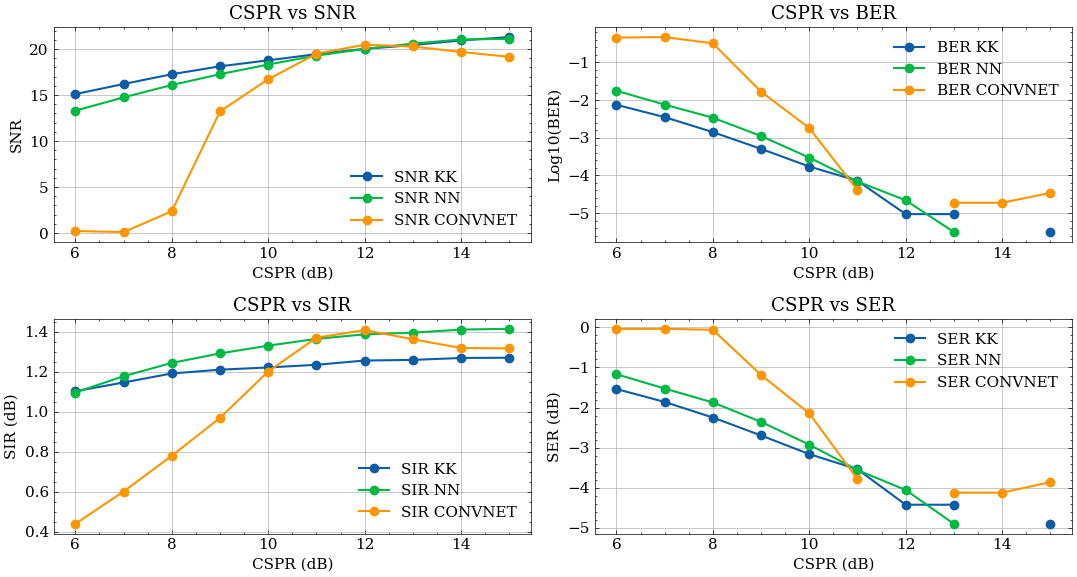

In [71]:
loPower = np.arange(6,16,1)
savePlots = True

CSPR_BER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample.npy')
CSPR_SIR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample.npy')
CSPR_SNR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample.npy')
CSPR_SER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample.npy')

labels = ['KK', 'NN', 'CONVNET']
fig, ax = plt.subplots(2, 2, figsize=(11,6))

for index in range(0, 3):
    # Plot SNR
    ax[0,0].plot(loPower, CSPR_SNR[index,:],'-o', label='SNR '+labels[index])
    ax[0,0].set_xlabel('CSPR (dB)')
    ax[0,0].set_ylabel('SNR')
    ax[0,0].title.set_text('CSPR vs SNR')
    ax[0,0].legend()
    ax[0,0].grid()
    # Plot BER
    ax[0,1].plot(loPower, np.log10(CSPR_BER[index,:]),'-o', label='BER '+labels[index])
    ax[0,1].set_xlabel('CSPR (dB)')
    ax[0,1].set_ylabel('Log10(BER)')
    ax[0,1].title.set_text('CSPR vs BER')
    ax[0,1].legend()
    ax[0,1].grid()
    # Plot SIR
    ax[1,0].plot(loPower, np.log10(CSPR_SIR[index,:]),'-o', label='SIR '+labels[index])
    ax[1,0].set_xlabel('CSPR (dB)')
    ax[1,0].set_ylabel('SIR (dB)')
    ax[1,0].title.set_text('CSPR vs SIR')
    ax[1,0].legend()
    ax[1,0].grid()
    # Plot SER
    ax[1,1].plot(loPower, np.log10(CSPR_SER[index,:]),'-o', label='SER '+labels[index])
    ax[1,1].set_xlabel('CSPR (dB)')
    ax[1,1].set_ylabel('SER (dB)')
    ax[1,1].title.set_text('CSPR vs SER')
    ax[1,1].legend()
    ax[1,1].grid()
    
    plt.tight_layout()

if savePlots:
    plt.savefig(figurePath+'\CSPR_Results.png', dpi=600)

## Roll-off variations results

C:\Users\Silas\AppData\Local\Temp\ipykernel_10940\1939537310.py:21: RuntimeWarning: divide by zero encountered in log10
  ax[0,1].plot(Rolloff, np.log10(Rolloff_BER[index,:]),'-o', label='BER '+labels[index])
C:\Users\Silas\AppData\Local\Temp\ipykernel_10940\1939537310.py:35: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(Rolloff, np.log10(Rolloff_SER[index,:]),'-o', label='SER '+labels[index])


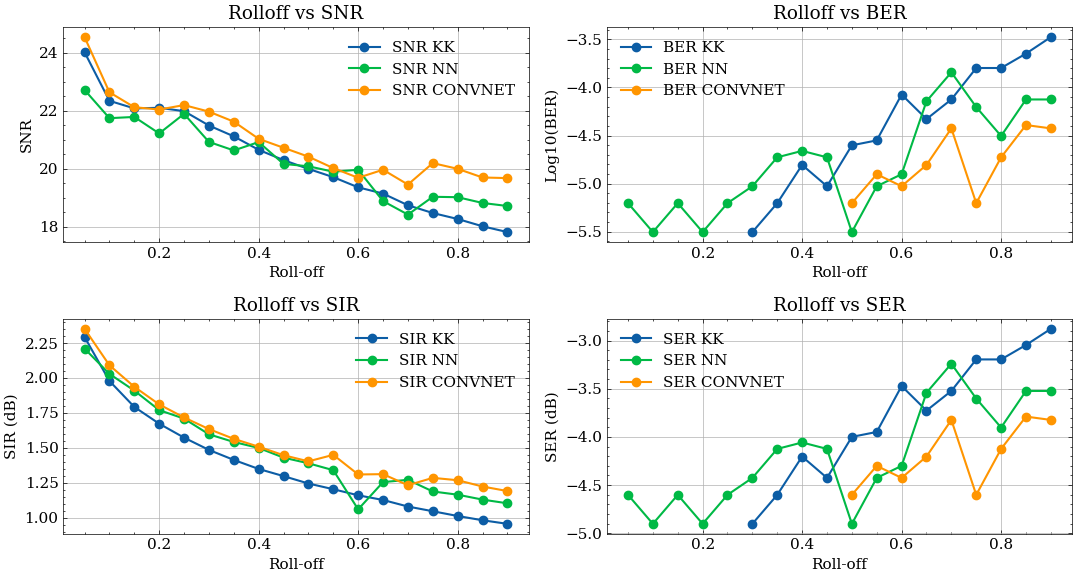

In [7]:
Rolloff = np.arange(0.05, 0.95, 0.05)
savePlots = True

Rolloff_BER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample.npy')
Rolloff_SIR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample.npy')
Rolloff_SNR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample.npy')
Rolloff_SER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample.npy')

labels = ['KK', 'NN', 'CONVNET']
fig, ax = plt.subplots(2, 2, figsize=(11,6))

for index in range(0, 3):
    # Plot SNR
    ax[0,0].plot(Rolloff, Rolloff_SNR[index,:],'-o', label='SNR '+labels[index])
    ax[0,0].set_xlabel('Roll-off')
    ax[0,0].set_ylabel('SNR')
    ax[0,0].title.set_text('Rolloff vs SNR')
    ax[0,0].legend()
    ax[0,0].grid()
    # Plot BER
    ax[0,1].plot(Rolloff, np.log10(Rolloff_BER[index,:]),'-o', label='BER '+labels[index])
    ax[0,1].set_xlabel('Roll-off')
    ax[0,1].set_ylabel('Log10(BER)')
    ax[0,1].title.set_text('Rolloff vs BER')
    ax[0,1].legend()
    ax[0,1].grid()
    # Plot SIR
    ax[1,0].plot(Rolloff, np.log10(Rolloff_SIR[index,:]),'-o', label='SIR '+labels[index])
    ax[1,0].set_xlabel('Roll-off')
    ax[1,0].set_ylabel('SIR (dB)')
    ax[1,0].title.set_text('Rolloff vs SIR')
    ax[1,0].legend()
    ax[1,0].grid()
    # Plot SER
    ax[1,1].plot(Rolloff, np.log10(Rolloff_SER[index,:]),'-o', label='SER '+labels[index])
    ax[1,1].set_xlabel('Roll-off')
    ax[1,1].set_ylabel('SER (dB)')
    ax[1,1].title.set_text('Rolloff vs SER')
    ax[1,1].legend()
    ax[1,1].grid()
    
    plt.tight_layout()


if savePlots:
    plt.savefig(figurePath+'\Rolloff_Results.png', dpi=600)

## FO variations results

C:\Users\Silas\AppData\Local\Temp\ipykernel_10940\3361173467.py:21: RuntimeWarning: divide by zero encountered in log10
  ax[0,1].plot(FO_Values, np.log10(FO_BER[index,:]),'-o', label='BER '+labels[index])
C:\Users\Silas\AppData\Local\Temp\ipykernel_10940\3361173467.py:35: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(FO_Values, np.log10(FO_SER[index,:]),'-o', label='SER '+labels[index])


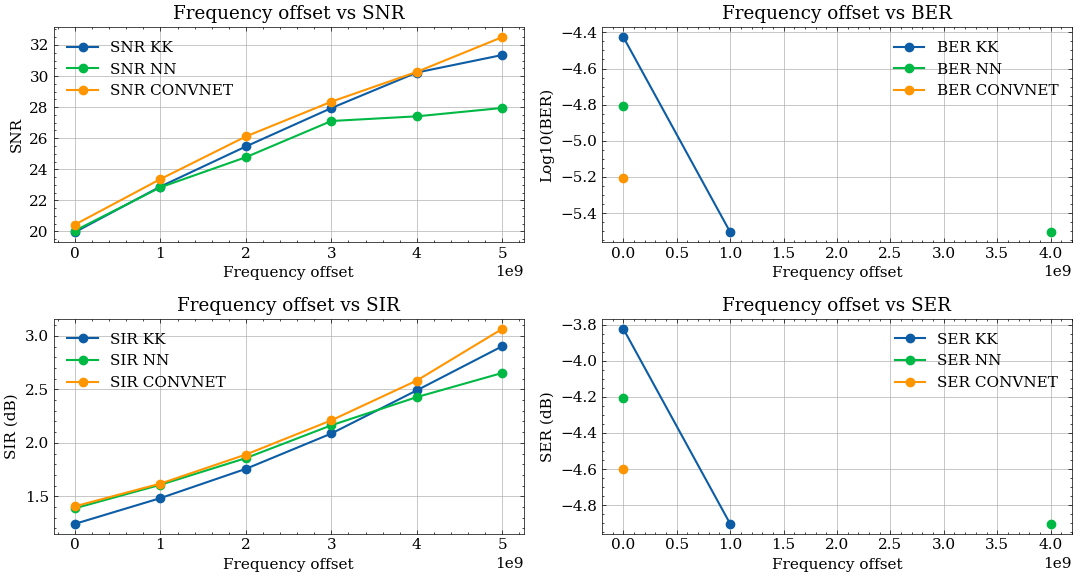

In [8]:
FO_Values = np.arange(0e9, 6e9, 1e9)
savePlots = True

FO_BER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_BER_SpS_4_128_Sample.npy')
FO_SIR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SIR_SpS_4_128_Sample.npy')
FO_SNR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SNR_SpS_4_128_Sample.npy')
FO_SER = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SER_SpS_4_128_Sample.npy')

labels = ['KK', 'NN', 'CONVNET']
fig, ax = plt.subplots(2, 2, figsize=(11,6))

for index in range(0, 3):
    # Plot SNR
    ax[0,0].plot(FO_Values, FO_SNR[index,:],'-o', label='SNR '+labels[index])
    ax[0,0].set_xlabel('Frequency offset')
    ax[0,0].set_ylabel('SNR')
    ax[0,0].title.set_text('Frequency offset vs SNR')
    ax[0,0].legend()
    ax[0,0].grid()
    # Plot BER
    ax[0,1].plot(FO_Values, np.log10(FO_BER[index,:]),'-o', label='BER '+labels[index])
    ax[0,1].set_xlabel('Frequency offset')
    ax[0,1].set_ylabel('Log10(BER)')
    ax[0,1].title.set_text('Frequency offset vs BER')
    ax[0,1].legend()
    ax[0,1].grid()
    # Plot SIR
    ax[1,0].plot(FO_Values, np.log10(FO_SIR[index,:]),'-o', label='SIR '+labels[index])
    ax[1,0].set_xlabel('Frequency offset')
    ax[1,0].set_ylabel('SIR (dB)')
    ax[1,0].title.set_text('Frequency offset vs SIR')
    ax[1,0].legend()
    ax[1,0].grid()
    # Plot SER
    ax[1,1].plot(FO_Values, np.log10(FO_SER[index,:]),'-o', label='SER '+labels[index])
    ax[1,1].set_xlabel('Frequency offset')
    ax[1,1].set_ylabel('SER (dB)')
    ax[1,1].title.set_text('Frequency offset vs SER')
    ax[1,1].legend()
    ax[1,1].grid()
    
    plt.tight_layout()


if savePlots:
    plt.savefig(figurePath+'\FO_Results.png', dpi=600)

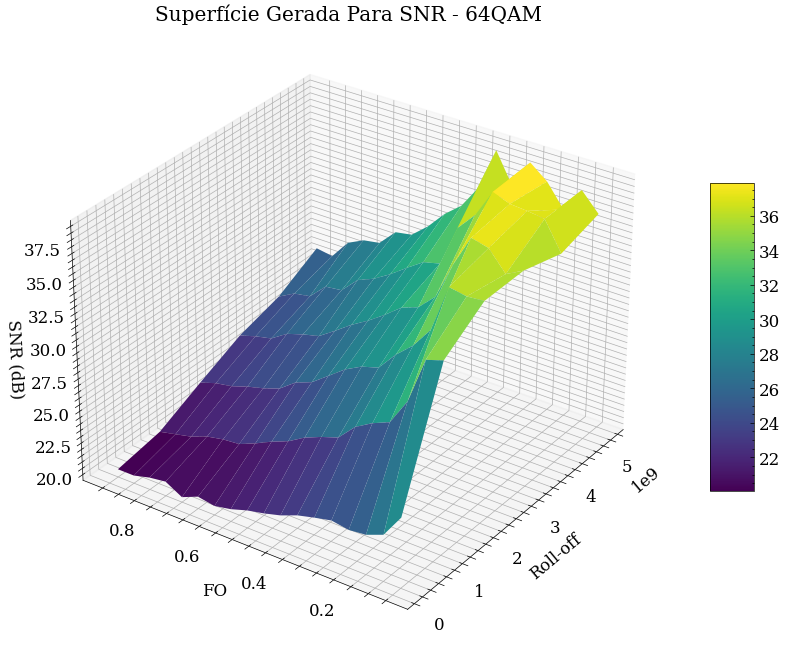

In [16]:
SNR = loadArray(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\DataSNR_SpS_4_128_Sample.npy')
savePlots = True

x = np.arange(0.05, 0.95, 0.05)
y = np.arange(0e9, 6e9, 1e9)

x, y = np.meshgrid(y, x)
z = SNR[2]

fig = plt.figure(figsize=(14, 8))
ax =  plt.axes(projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0.5, antialiased=True, edgecolor='None')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=7)
ax.set_xlabel('Roll-off')
ax.set_ylabel('FO')
ax.set_zlabel('SNR (dB)')
ax.set_title('Superfície Gerada Para SNR - 64QAM')
ax.view_init(elev=30, azim=215)

if savePlots:
    plt.savefig(figurePath+'\SNR_all_CONVNET.png', dpi=600)

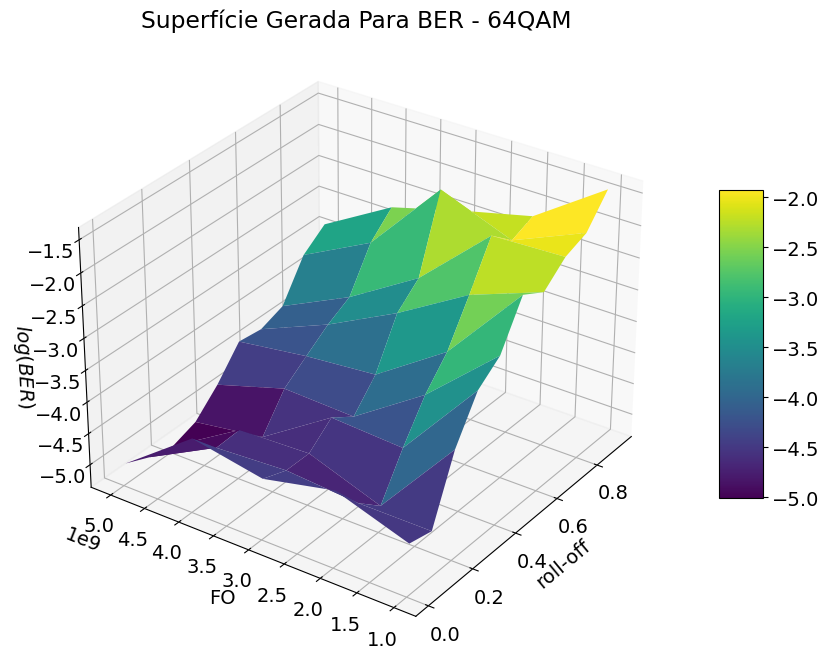

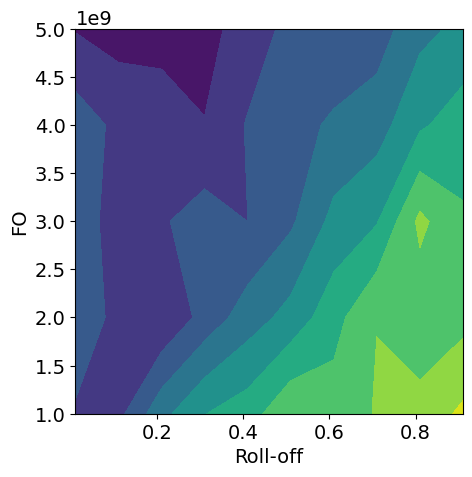

In [6]:
N = 256  # number of input amplitude samples to the NN
SpS_out = 4

# calculates the average of BER arrays
BER_NN = np.mean(np.array([load_Arrays(0, SpS_out, N), load_Arrays(1, SpS_out, N), load_Arrays(2, SpS_out, N), load_Arrays(3, SpS_out, N), load_Arrays(4, SpS_out, N)]), axis=0)

x = np.arange(0.01, 0.99, 0.1)
y = np.arange(1e9, 6e9, 1e9)

x, y = np.meshgrid(x, y)
z = np.log10(BER_NN)  # shape((5, 10))

fig = plt.figure(figsize=(14, 8))
ax =  plt.axes(projection='3d')

fig = plt.figure(figsize=(5, 5))
plt.contourf(x, y, z, cmap=cm.viridis)
plt.xlabel('Roll-off')
plt.ylabel('FO')
plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_ModelPerformanceContourf_64QAM.png', dpi=600)

surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0.5, antialiased=True, edgecolor='None')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=7)
ax.set_xlabel('roll-off')
ax.set_ylabel('FO')
ax.set_zlabel(r'$log(BER)$')
ax.set_title('Superfície Gerada Para BER - 64QAM')
ax.view_init(elev=30, azim=215)

plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_ModelPerformance_64QAM_Mean.png', dpi=300)

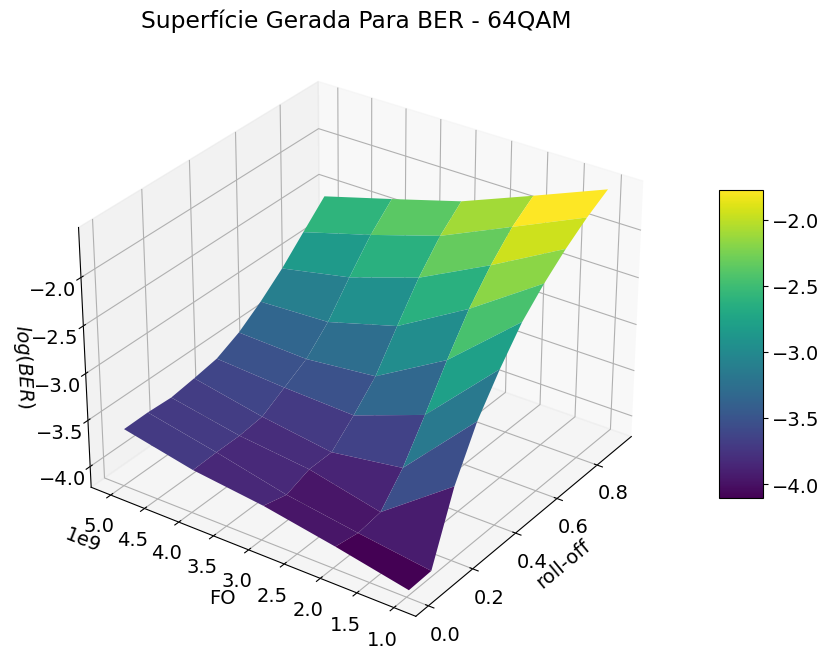

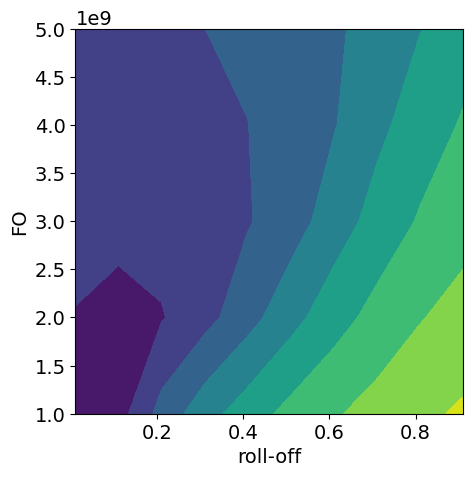

In [7]:
# calculates the average of BER arrays
BER_KK = np.mean(np.array([load_Arrays(0, SpS_out, None, 'KK'), load_Arrays(1, SpS_out, None, 'KK'), load_Arrays(2, SpS_out, None, 'KK'), load_Arrays(3, SpS_out, None, 'KK'), load_Arrays(4, SpS_out, None, 'KK')]), axis=0)

x = np.arange(0.01, 0.99, 0.1)
y = np.arange(1e9, 6e9, 1e9)

x, y = np.meshgrid(x, y)
z = np.log10(BER_KK)  # shape((5, 10))

fig = plt.figure(figsize=(14, 8))
ax =  plt.axes(projection='3d')

fig = plt.figure(figsize=(5, 5))
plt.contourf(x, y, z, cmap=cm.viridis)
plt.xlabel('roll-off')
plt.ylabel('FO')
plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_ModelPerformanceContourf_64QAM.png', dpi=600)

surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0.5, antialiased=True, edgecolor='None')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=7)
ax.set_xlabel('roll-off')
ax.set_ylabel('FO')
ax.set_zlabel(r'$log(BER)$')
ax.set_title('Superfície Gerada Para BER - 64QAM')
ax.view_init(elev=30, azim=215)

plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_KKPerformance_64QAM_Mean.png', dpi=600)

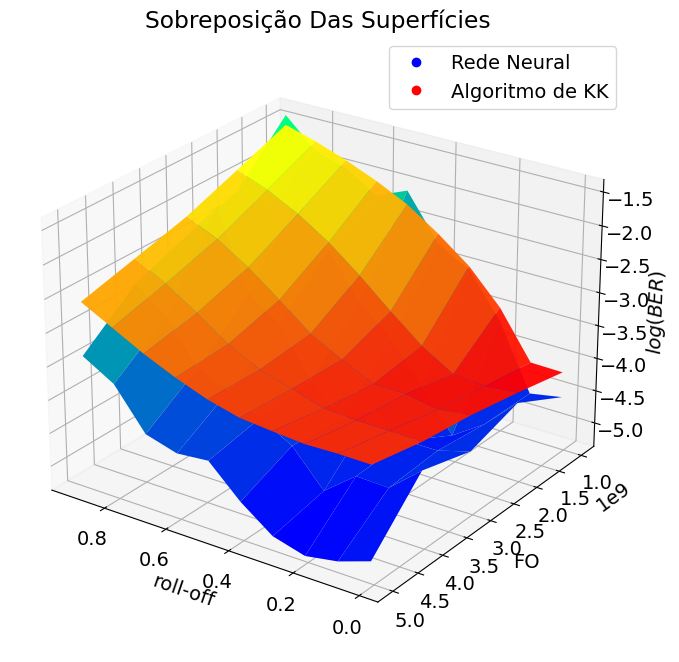

In [8]:
x = np.arange(0.01, 0.99, 0.1)
y = np.arange(1e9, 6e9, 1e9)

x, y = np.meshgrid(x, y)
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, np.log10(BER_NN), alpha = 1, rstride=1, cstride=1, cmap=cm.winter, linewidth=0.5, antialiased=True, zorder = 0.5)
ax.plot_surface(x, y, np.log10(BER_KK), alpha = 0.95, rstride=1, cstride=1, cmap=cm.autumn, linewidth=0.5, antialiased=True, zorder = 0.3)
ax.set_title('Sobreposição Das Superfícies')
ax.set_xlabel('roll-off')
ax.set_ylabel('FO')
ax.set_zlabel('$log(BER)$')
ax.view_init(elev=25, azim=125)

# fake legends
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
fake2Dline2 = mpl.lines.Line2D([0],[0], linestyle="none", c='r', marker = 'o')
ax.legend([fake2Dline, fake2Dline2], ['Rede Neural', 'Algoritmo de KK'], numpoints = 1)

plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_SuperpositionSurfaces_64QAM.png', dpi=600)

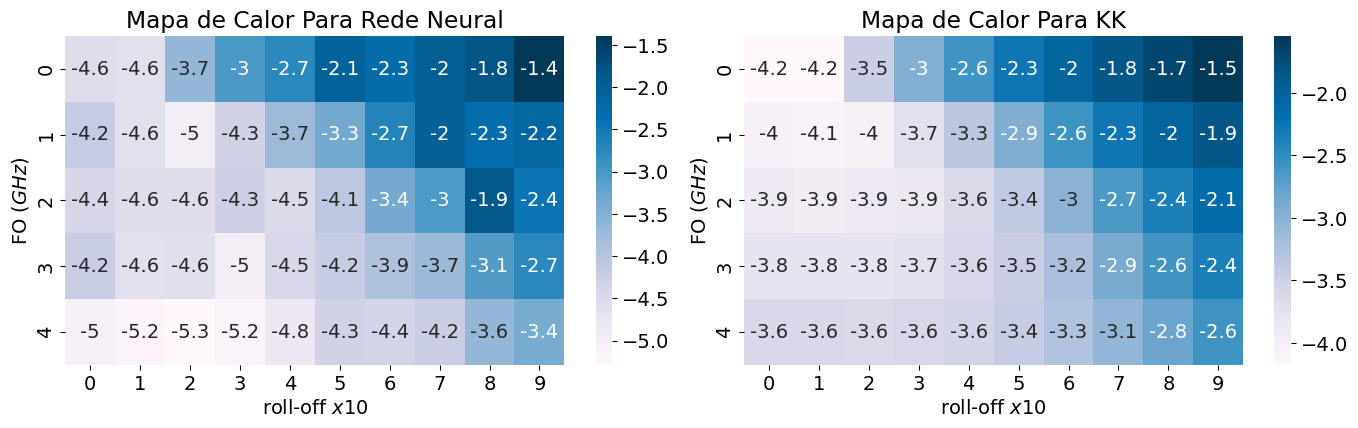

In [10]:
fig = plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
heatMap_NN = sns.heatmap(np.log10(BER_NN), annot=True, cmap='PuBu')
heatMap_NN.set(xlabel='roll-off $x10$', ylabel='FO $(GHz$)', title='Mapa de Calor Para Rede Neural');

plt.subplot(2, 2, 2)
heatMap_KK = sns.heatmap(np.log10(BER_KK), annot=True, cmap='PuBu')
heatMap_KK.set(xlabel='roll-off $x10$', ylabel='FO $(GHz$)', title='Mapa de Calor Para KK');

plt.tight_layout()
plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_HeatMap_64QAM.png', dpi=600)